In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


path = '/content/drive/MyDrive/Sem-7 Books/EE4708/Assignment-6/' ### CHANGE TO PATH OF DATASETS TO RUN

In [5]:
df = pd.read_csv(path+'pulsar_data_train.csv')

df.head()

Mean of the integrated profile  ...  target_class
0                       121.156250  ...           0.0
1                        76.968750  ...           0.0
2                       130.585938  ...           0.0
3                       156.398438  ...           0.0
4                        84.804688  ...           0.0

[5 rows x 9 columns]

In [6]:
df.describe()

Mean of the integrated profile  ...  target_class
count                     12528.000000  ...  12528.000000
mean                        111.041841  ...      0.092034
std                          25.672828  ...      0.289085
min                           5.812500  ...      0.000000
25%                         100.871094  ...      0.000000
50%                         115.183594  ...      0.000000
75%                         127.109375  ...      0.000000
max                         189.734375  ...      1.000000

[8 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


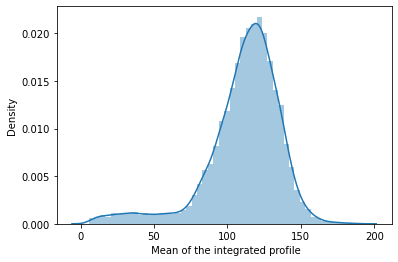

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


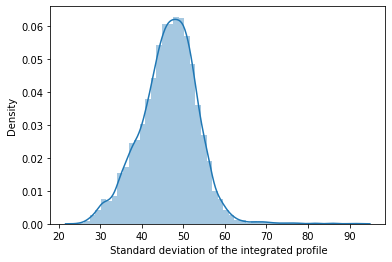

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


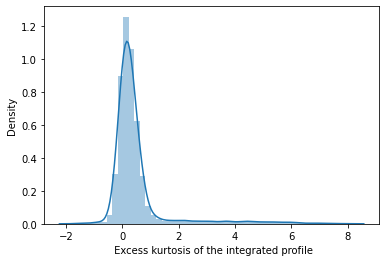

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


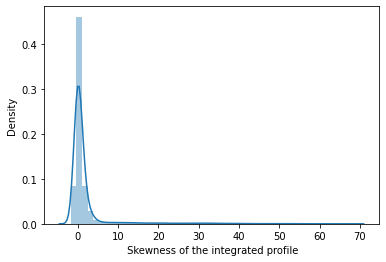

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


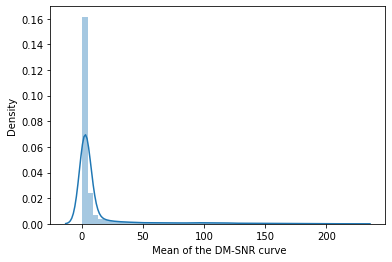

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


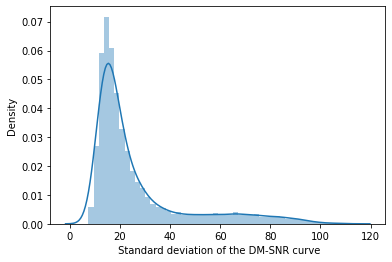

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


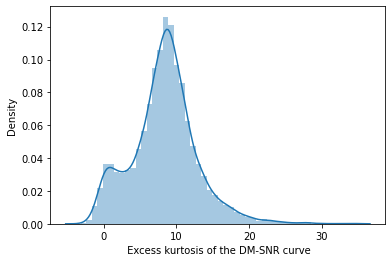

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


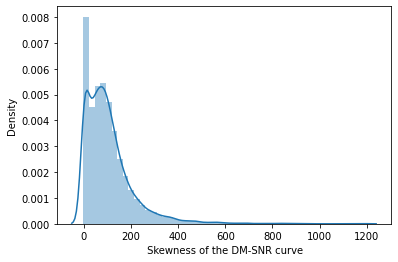

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


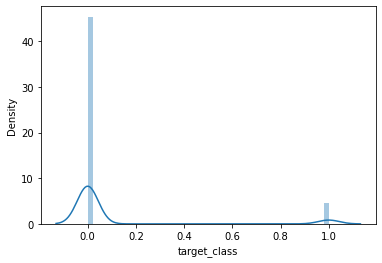

In [7]:
for i in df.columns:
  sns.distplot(df[i])
  plt.show()

In [8]:
df.isna().sum()/df.shape[0]

 Mean of the integrated profile                  0.000000
 Standard deviation of the integrated profile    0.000000
 Excess kurtosis of the integrated profile       0.138490
 Skewness of the integrated profile              0.000000
 Mean of the DM-SNR curve                        0.000000
 Standard deviation of the DM-SNR curve          0.094029
 Excess kurtosis of the DM-SNR curve             0.000000
 Skewness of the DM-SNR curve                    0.049888
target_class                                     0.000000
dtype: float64

In [9]:
### PRINTING ALL UNIQUE VALUES IN EACH COLUMN
for i in df.columns:
  print(i, df[i].nunique())
  print(df[i].unique())
  print("--------------")

 Mean of the integrated profile 7192
[121.15625    76.96875   130.5859375 ... 115.375      90.5703125
 135.6640625]
--------------
 Standard deviation of the integrated profile 12510
[48.37297113 36.17555664 53.22953353 ... 43.21384643 49.93374944
 50.47225643]
--------------
 Excess kurtosis of the integrated profile 10793
[ 0.37548466  0.71289786  0.13340829 ...  0.66345569 -0.08994031
  0.34617808]
--------------
 Skewness of the integrated profile 12528
[-0.01316549  3.38871856 -0.29724164 ...  0.43308797 -0.22672618
  0.18479723]
--------------
 Mean of the DM-SNR curve 7224
[  3.16889632   2.39966555   2.74331104 ... 152.4197324    7.18645485
   6.14046823]
--------------
 Standard deviation of the DM-SNR curve 11348
[18.3993666  17.57099693 22.36255299 ... 11.62814941 21.50150499
 11.79260254]
--------------
 Excess kurtosis of the DM-SNR curve 12526
[ 7.44987415  9.41465226  8.50836378 ... 17.05521452  7.3983949
 17.66222194]
--------------
 Skewness of the DM-SNR curve 11901
[

In [10]:
# OBSERVING DETAILS FOR EACH COLUMN
df.describe()

Mean of the integrated profile  ...  target_class
count                     12528.000000  ...  12528.000000
mean                        111.041841  ...      0.092034
std                          25.672828  ...      0.289085
min                           5.812500  ...      0.000000
25%                         100.871094  ...      0.000000
50%                         115.183594  ...      0.000000
75%                         127.109375  ...      0.000000
max                         189.734375  ...      1.000000

[8 rows x 9 columns]

In [11]:
df.head()

Mean of the integrated profile  ...  target_class
0                       121.156250  ...           0.0
1                        76.968750  ...           0.0
2                       130.585938  ...           0.0
3                       156.398438  ...           0.0
4                        84.804688  ...           0.0

[5 rows x 9 columns]

In [12]:
# DROPPING MISSING VALUES
df.isna().sum()
# df.dropna(inplace=True)

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

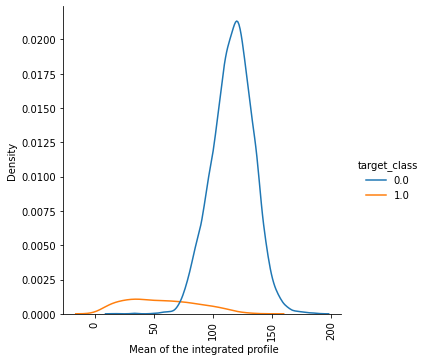

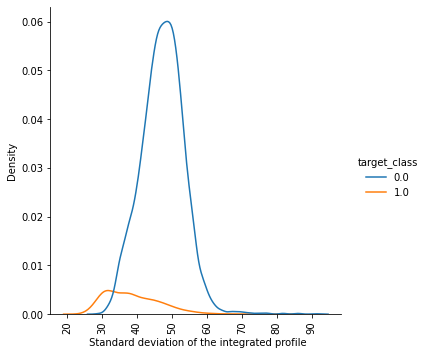

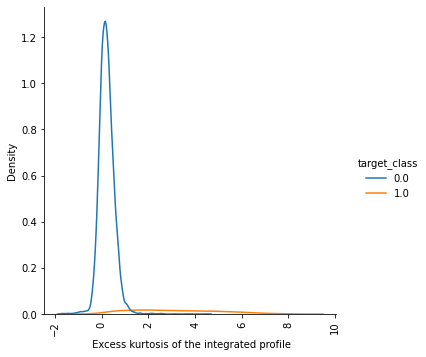

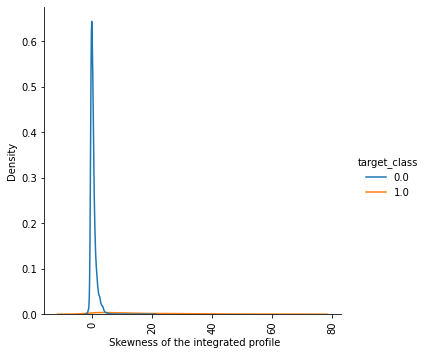

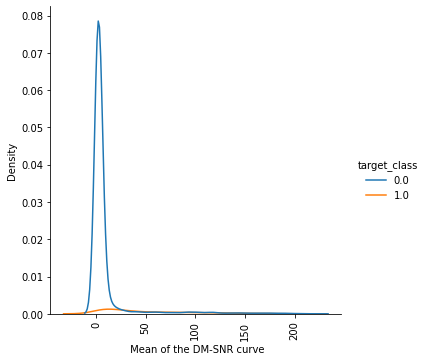

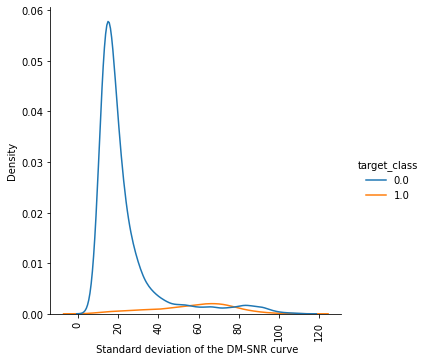

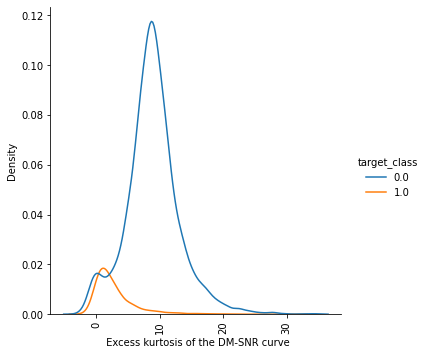

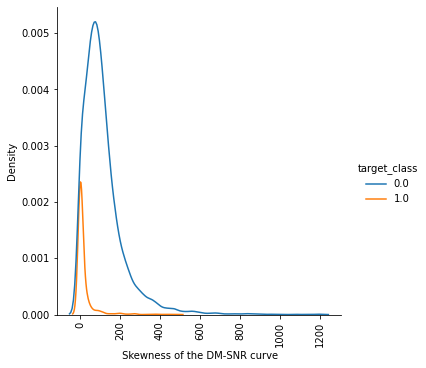

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


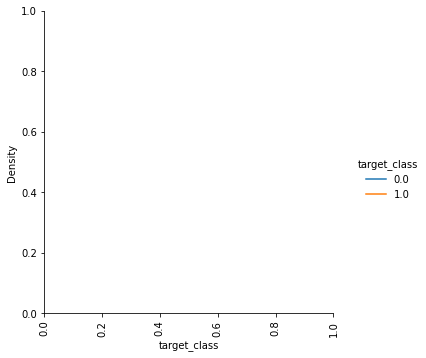

In [13]:
# PLOTTING COUNTS OF EACH FEATURE SPLITTING BY TARGET
test_cols = df.columns
for i in test_cols:
  sns.displot(x=i, hue='target_class', data=df, kind="kde")
  plt.xticks(rotation=90)
  plt.show()

In [14]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

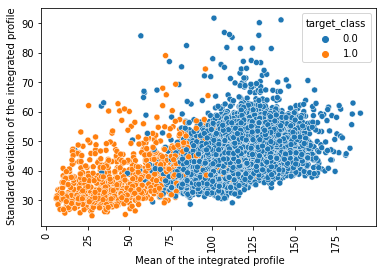

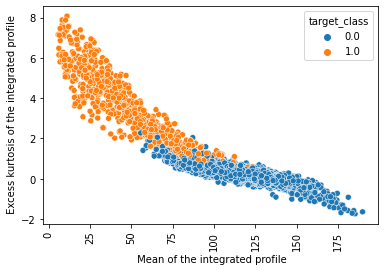

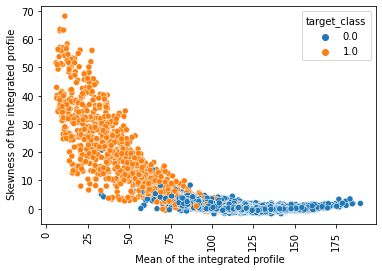

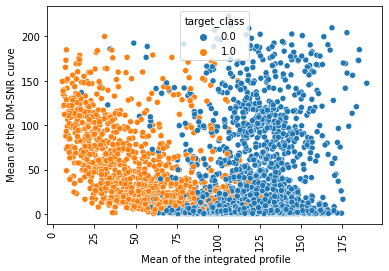

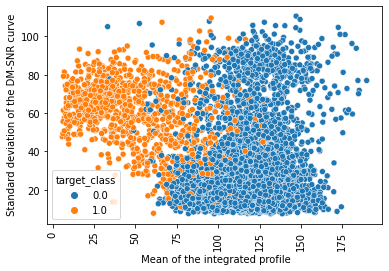

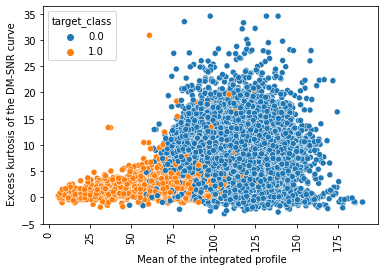

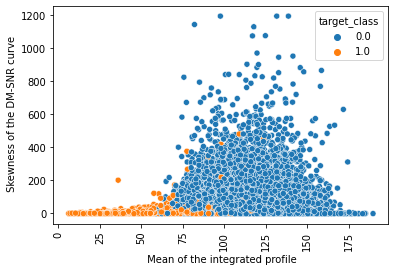

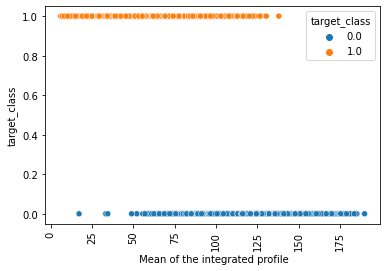

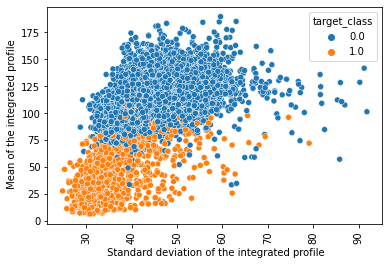

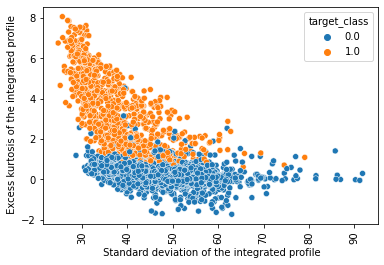

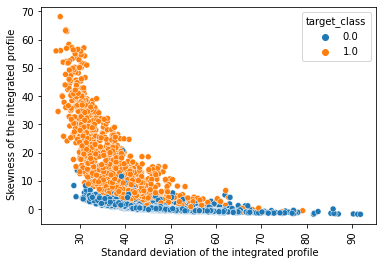

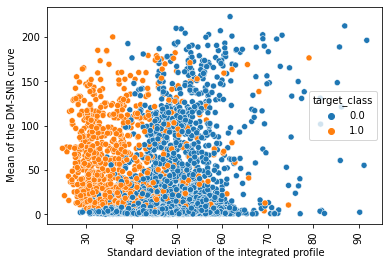

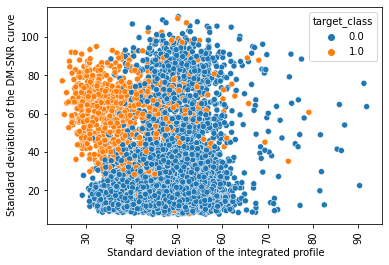

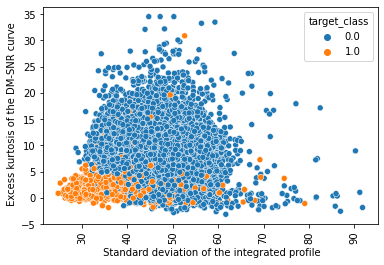

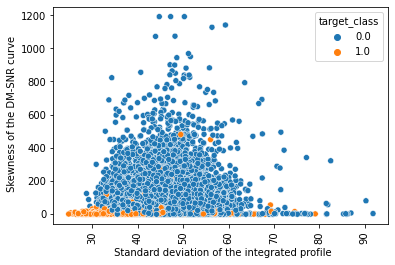

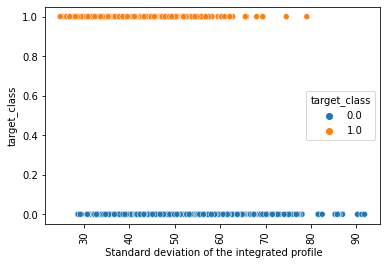

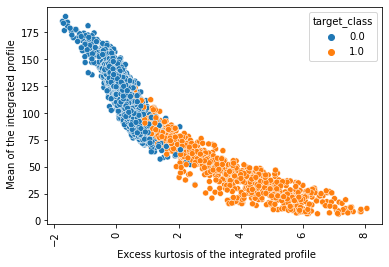

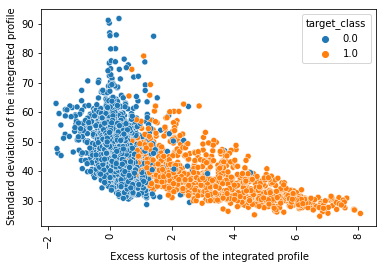

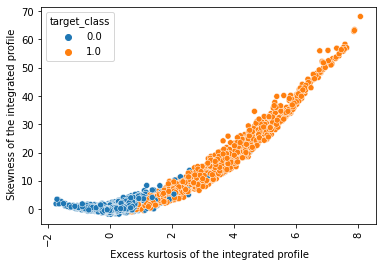

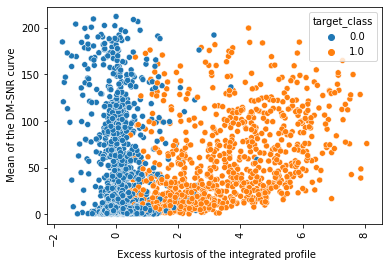

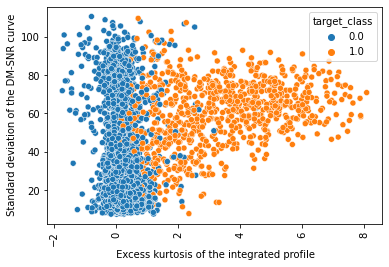

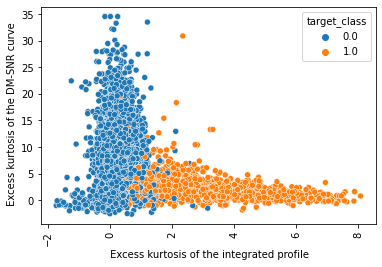

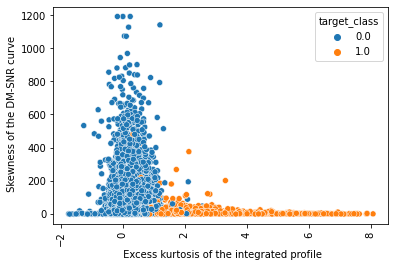

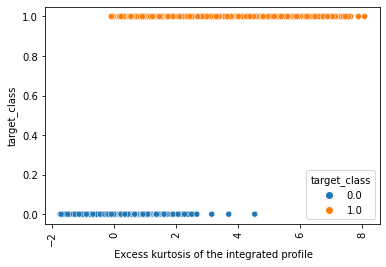

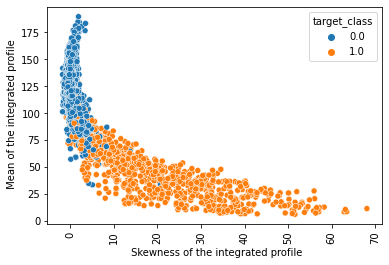

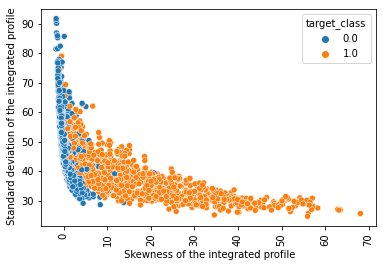

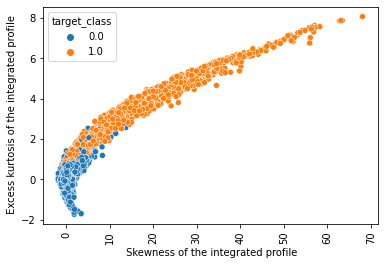

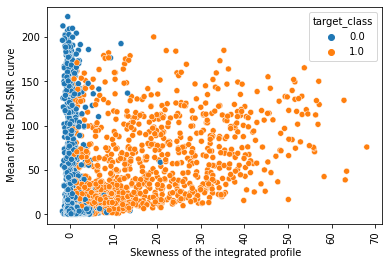

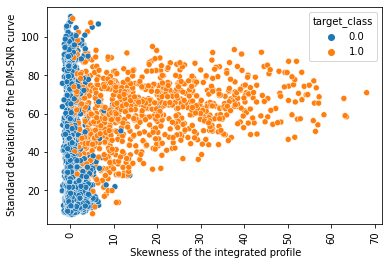

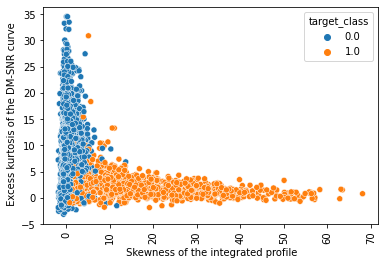

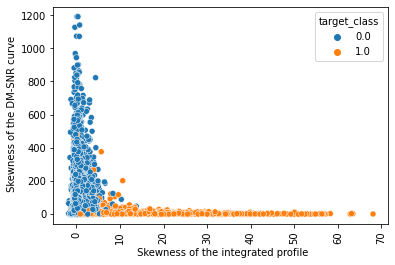

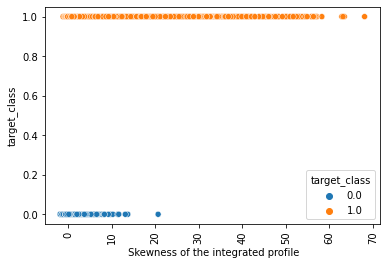

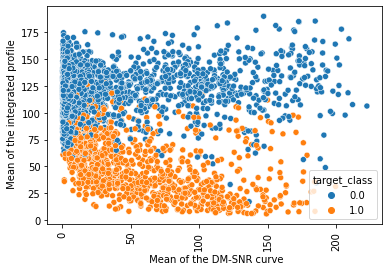

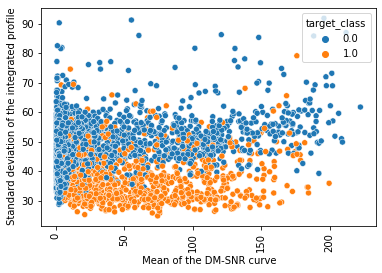

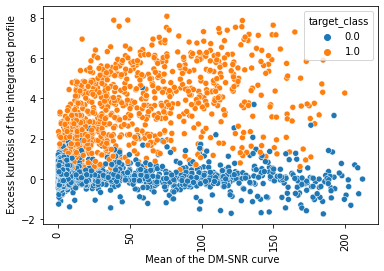

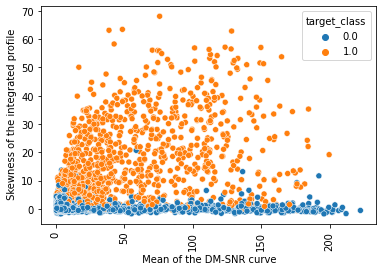

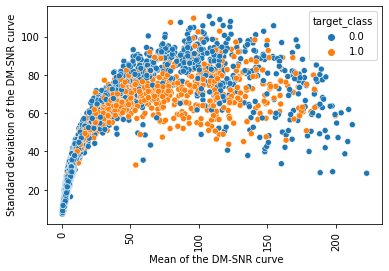

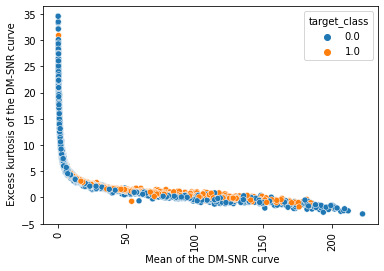

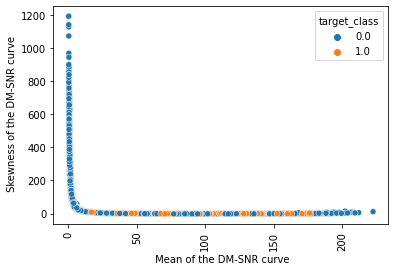

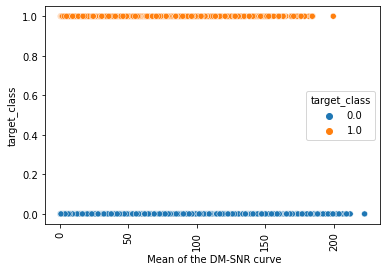

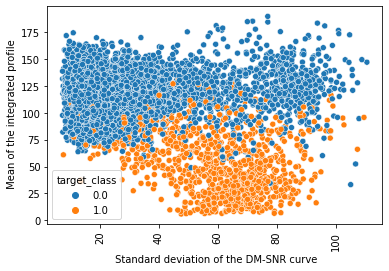

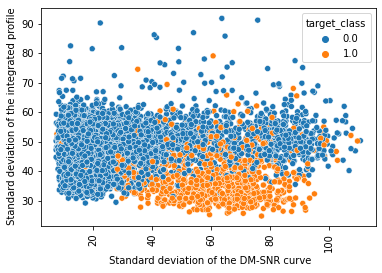

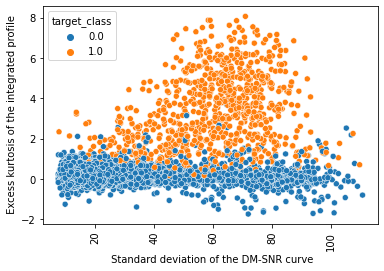

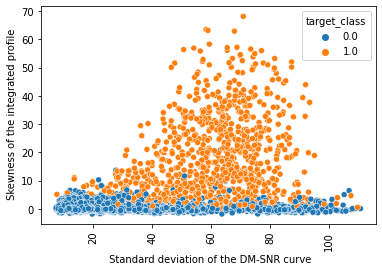

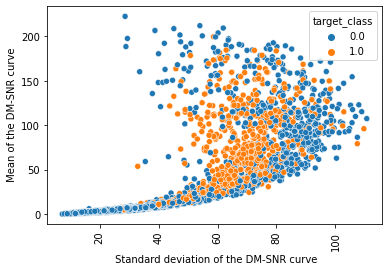

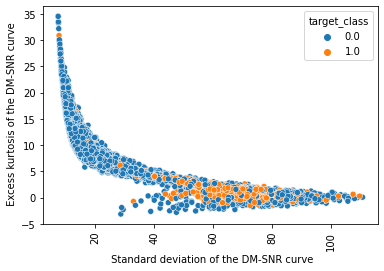

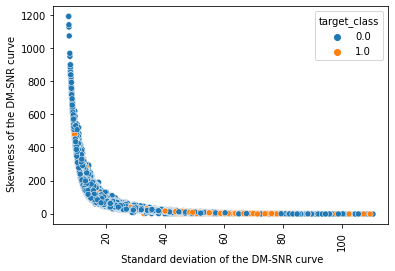

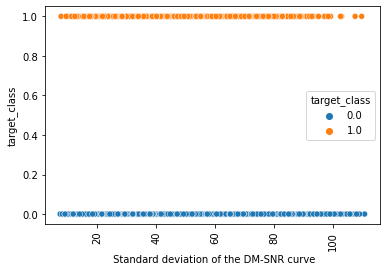

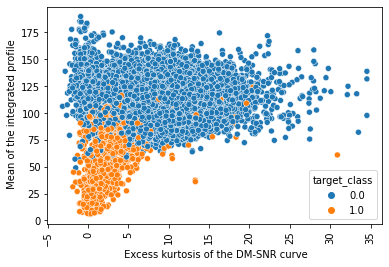

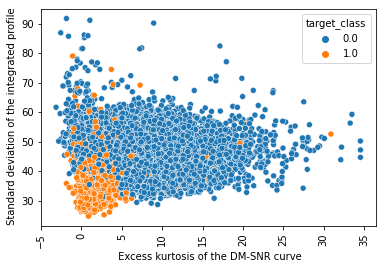

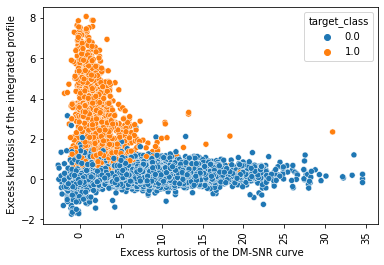

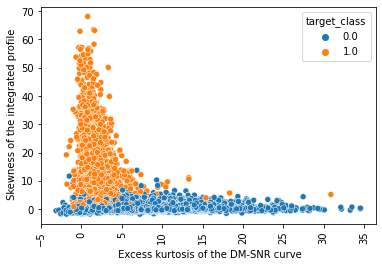

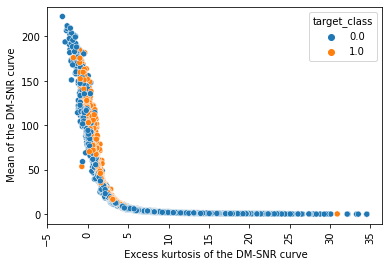

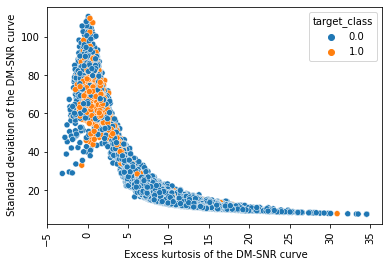

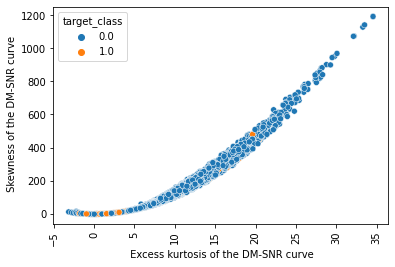

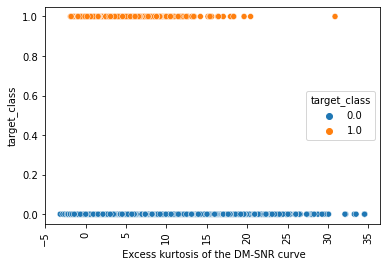

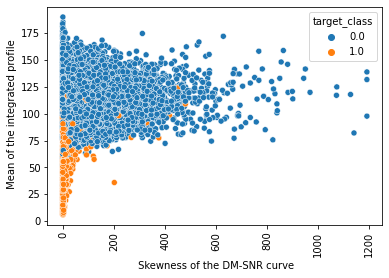

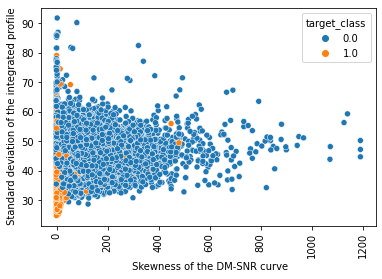

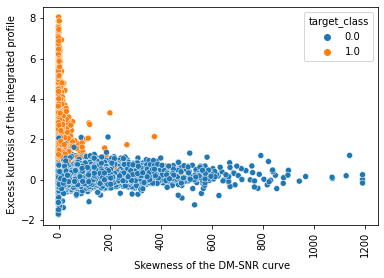

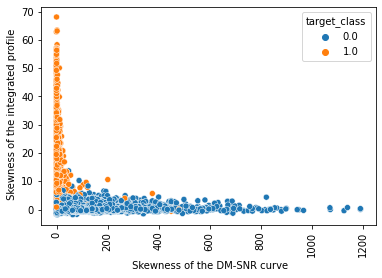

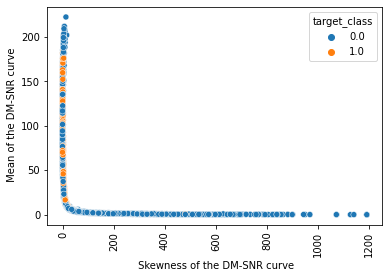

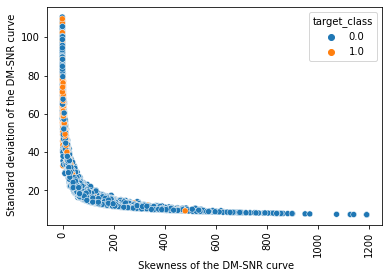

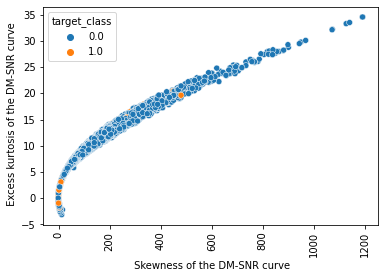

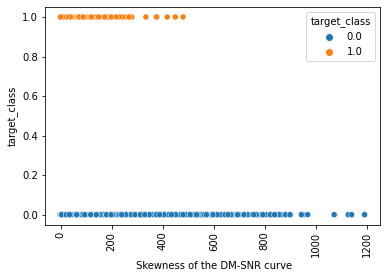

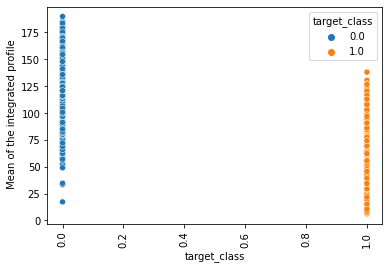

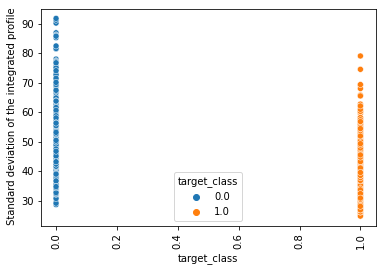

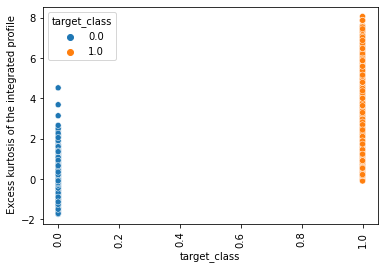

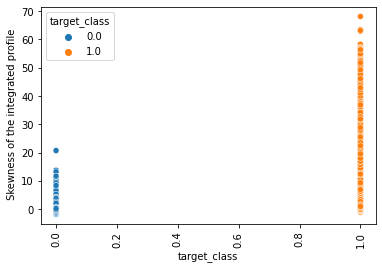

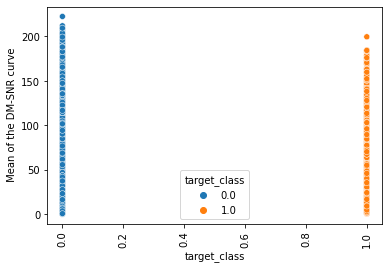

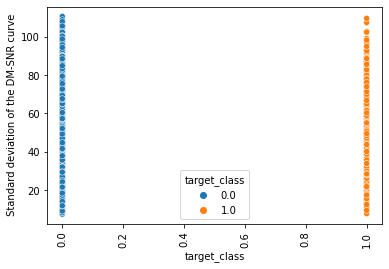

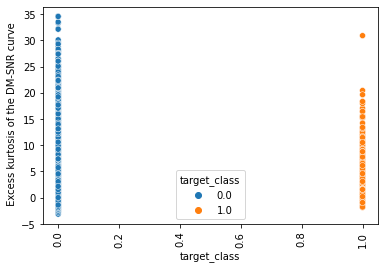

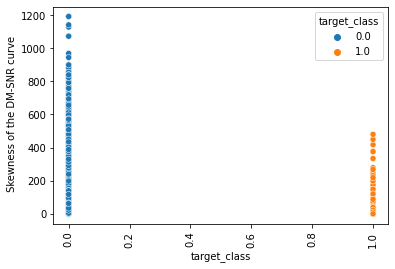

In [15]:
# scatterplots

x = df.columns
y = df.columns
for n in y:
  for m in y:
   if n!=m:
    sns.scatterplot(y=m, x=n, data=df, hue='target_class')
    plt.xticks(rotation=90) 
    plt.show()

In [ ]:
# CREATING X AND Y
df = df.dropna()
X = df.drop(['target_class'], axis=1)
y = df['target_class']

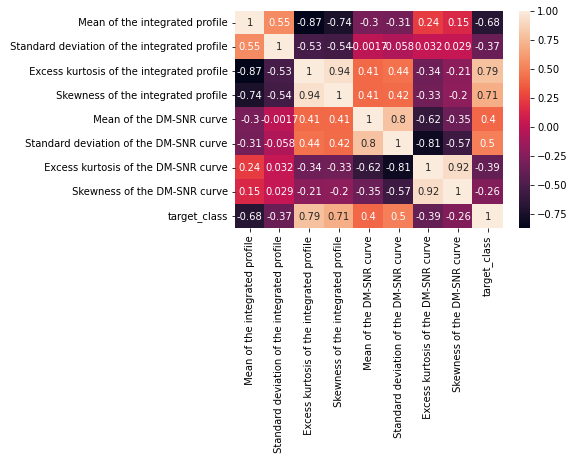

In [ ]:
# HEATMAP OF CORRELATION AMONG FEATURES
sns.heatmap(df.corr(), annot=True)

In [ ]:
# MODEL BUILDING
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 4637 points : 96


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4212
         1.0       0.94      0.82      0.88       425

    accuracy                           0.98      4637
   macro avg       0.96      0.91      0.93      4637
weighted avg       0.98      0.98      0.98      4637



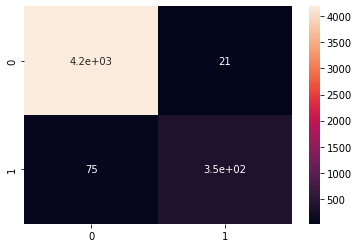

In [ ]:
#CONFUSION MATRIX

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
df_test = pd.read_csv(path+"pulsar_data_test.csv")
df_test

Mean of the integrated profile  ...  target_class
0                          116.906250  ...           NaN
1                           75.585938  ...           NaN
2                          103.273438  ...           NaN
3                          101.078125  ...           NaN
4                          113.226562  ...           NaN
...                               ...  ...           ...
5365                       116.531250  ...           NaN
5366                       114.976562  ...           NaN
5367                       136.171875  ...           NaN
5368                       106.500000  ...           NaN
5369                       110.679688  ...           NaN

[5370 rows x 9 columns]

In [ ]:
# clf.predict(df_test.drop("target_class", axis=1))